In [1]:
# Recurrent Neural Network
time_steps = 15
date_format = '%Y-%m-%d'

# Part 1 - Data Preprocessing

# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# importing the training set
dataset_train = pd.read_csv('csv/lpz-cases.csv', header=None)
training_set = dataset_train.iloc[:, 1:2].values

# feature scaling
# normalisation is recomended for RNN instead of standarization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))  # all scaled prices should be between 0 and 1
training_set_scaled = sc.fit_transform(training_set)

# creating a data structure with 10 timesteps and 1 output
X_train = []
y_train = []
for i in range(time_steps, len(training_set)):
    X_train.append(training_set_scaled[i-time_steps:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# reshaping
# X_train.shape[0] number of lines
# X_train.shape[1] number of columns
# 1 number of predictors
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# initialising the RNN
regressor = Sequential()

# adding the 1st LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # the first dimension (X_train.shape[0]) is not required because is automatically used
regressor.add(Dropout(0.2))

# adding the 2nd LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# adding the 3rd LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# adding the 4th LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# adding the output layer
regressor.add(Dense(units=1))
              
# compiling the RNN
# RMSprop optimizer is also recommended for RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

# fitting the RNN to the training set
regressor.fit(X_train, y_train, epochs=2000, batch_size=32)

Using TensorFlow backend.


Epoch 1/2000
48/48 [==============================] - 2s 50ms/step - loss: 0.1393
Epoch 2/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.1131
Epoch 3/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0875
Epoch 4/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0609
Epoch 5/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0624
Epoch 6/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0680
Epoch 7/2000
48/48 [==============================] - 0s 6ms/step - loss: 0.0586
Epoch 8/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0559
Epoch 9/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0595
Epoch 10/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0581
Epoch 11/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0618
Epoch 12/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0554
Epoch 13/2000
48/48 [===

Epoch 101/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0514
Epoch 102/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0552
Epoch 103/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0573
Epoch 104/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0526
Epoch 105/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0563
Epoch 106/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0562
Epoch 107/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0585
Epoch 108/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0581
Epoch 109/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0575
Epoch 110/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0555
Epoch 111/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0560
Epoch 112/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0546
Epoc

48/48 [==============================] - 0s 4ms/step - loss: 0.0568
Epoch 200/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0527
Epoch 201/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0564
Epoch 202/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0600
Epoch 203/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0556
Epoch 204/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0551
Epoch 205/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0586
Epoch 206/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0563
Epoch 207/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0531
Epoch 208/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0539
Epoch 209/2000
48/48 [==============================] - 0s 2ms/step - loss: 0.0583
Epoch 210/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0547
Epoch 211/2000
48/4

48/48 [==============================] - 0s 4ms/step - loss: 0.0546
Epoch 298/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0581
Epoch 299/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0552
Epoch 300/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0563
Epoch 301/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0534
Epoch 302/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0531
Epoch 303/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0531
Epoch 304/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0554
Epoch 305/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0538
Epoch 306/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0543
Epoch 307/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0568
Epoch 308/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0565
Epoch 309/2000
48/4

48/48 [==============================] - 0s 3ms/step - loss: 0.0518
Epoch 396/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0544
Epoch 397/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0518
Epoch 398/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0504
Epoch 399/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0499
Epoch 400/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0495
Epoch 401/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0511
Epoch 402/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0505
Epoch 403/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0552
Epoch 404/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 405/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0496
Epoch 406/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0515
Epoch 407/2000
48/4

48/48 [==============================] - 0s 3ms/step - loss: 0.0466
Epoch 494/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0501
Epoch 495/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0504
Epoch 496/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0507
Epoch 497/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0450
Epoch 498/2000
48/48 [==============================] - 0s 2ms/step - loss: 0.0493
Epoch 499/2000
48/48 [==============================] - 0s 2ms/step - loss: 0.0467
Epoch 500/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0498
Epoch 501/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0459
Epoch 502/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0446
Epoch 503/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0492
Epoch 504/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0497
Epoch 505/2000
48/4

48/48 [==============================] - 0s 4ms/step - loss: 0.0367
Epoch 592/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0421
Epoch 593/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0449
Epoch 594/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0436
Epoch 595/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0412
Epoch 596/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0421
Epoch 597/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0407
Epoch 598/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0378
Epoch 599/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0493
Epoch 600/2000
48/48 [==============================] - 0s 5ms/step - loss: 0.0391
Epoch 601/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0405
Epoch 602/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0429
Epoch 603/2000
48/4

48/48 [==============================] - 0s 4ms/step - loss: 0.0397
Epoch 690/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0405
Epoch 691/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0373
Epoch 692/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 693/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0342
Epoch 694/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0357
Epoch 695/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0368
Epoch 696/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0372
Epoch 697/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0416
Epoch 698/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0430
Epoch 699/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0430
Epoch 700/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0384
Epoch 701/2000
48/4

48/48 [==============================] - 0s 5ms/step - loss: 0.0306
Epoch 788/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0313
Epoch 789/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0297
Epoch 790/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0355
Epoch 791/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0338
Epoch 792/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0345
Epoch 793/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0367
Epoch 794/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0414
Epoch 795/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0361
Epoch 796/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0343
Epoch 797/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0307
Epoch 798/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0347
Epoch 799/2000
48/4

48/48 [==============================] - 0s 3ms/step - loss: 0.0284
Epoch 886/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0258
Epoch 887/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0272
Epoch 888/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 889/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0245
Epoch 890/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0247
Epoch 891/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0267
Epoch 892/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0303
Epoch 893/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0277
Epoch 894/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0263
Epoch 895/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0217
Epoch 896/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0263
Epoch 897/2000
48/4

48/48 [==============================] - 0s 4ms/step - loss: 0.0243
Epoch 984/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0237
Epoch 985/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0270
Epoch 986/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0243
Epoch 987/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0255
Epoch 988/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0269
Epoch 989/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0252
Epoch 990/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0288
Epoch 991/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0249
Epoch 992/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0253
Epoch 993/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0261
Epoch 994/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0234
Epoch 995/2000
48/4

48/48 [==============================] - 0s 4ms/step - loss: 0.0233
Epoch 1081/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0226
Epoch 1082/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0223
Epoch 1083/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0210
Epoch 1084/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0197
Epoch 1085/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0209
Epoch 1086/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0185
Epoch 1087/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0204
Epoch 1088/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 1089/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0202
Epoch 1090/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0224
Epoch 1091/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0215
Epoch 10

48/48 [==============================] - 0s 3ms/step - loss: 0.0210
Epoch 1178/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 1179/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0209
Epoch 1180/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0222
Epoch 1181/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0187
Epoch 1182/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0184
Epoch 1183/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0180
Epoch 1184/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0192
Epoch 1185/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0190
Epoch 1186/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0194
Epoch 1187/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 1188/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0167
Epoch 11

48/48 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 1275/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 1276/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 1277/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0161
Epoch 1278/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0176
Epoch 1279/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0138
Epoch 1280/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 1281/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 1282/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0167
Epoch 1283/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0140
Epoch 1284/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0153
Epoch 1285/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0181
Epoch 12

48/48 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 1372/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 1373/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 1374/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0155
Epoch 1375/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 1376/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 1377/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0153
Epoch 1378/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0133
Epoch 1379/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0124
Epoch 1380/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0144
Epoch 1381/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 1382/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0116
Epoch 13

48/48 [==============================] - 0s 4ms/step - loss: 0.0122
Epoch 1469/2000
48/48 [==============================] - 0s 5ms/step - loss: 0.0117
Epoch 1470/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0141
Epoch 1471/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0146
Epoch 1472/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 1473/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0133
Epoch 1474/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0134
Epoch 1475/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0163
Epoch 1476/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0129
Epoch 1477/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0140
Epoch 1478/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 1479/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 14

48/48 [==============================] - 0s 3ms/step - loss: 0.0145
Epoch 1566/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 1567/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0121
Epoch 1568/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 1569/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 1570/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 1571/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0115
Epoch 1572/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 1573/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 1574/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 1575/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 1576/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0122
Epoch 15

48/48 [==============================] - 0s 4ms/step - loss: 0.0154
Epoch 1663/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 1664/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 1665/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0132
Epoch 1666/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0140
Epoch 1667/2000
48/48 [==============================] - 0s 5ms/step - loss: 0.0115
Epoch 1668/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0141
Epoch 1669/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 1670/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 1671/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0127
Epoch 1672/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0159
Epoch 1673/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0116
Epoch 16

48/48 [==============================] - 0s 4ms/step - loss: 0.0122
Epoch 1760/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0116
Epoch 1761/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0155
Epoch 1762/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0114
Epoch 1763/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 1764/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 1765/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 1766/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 1767/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0129
Epoch 1768/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 1769/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0107
Epoch 1770/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 17

48/48 [==============================] - 0s 4ms/step - loss: 0.0117
Epoch 1857/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 1858/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 1859/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 1860/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 1861/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0127
Epoch 1862/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 1863/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 1864/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 1865/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 1866/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 1867/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 18

48/48 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 1954/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 1955/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 1956/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 1957/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 1958/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 1959/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 1960/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 1961/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 1962/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0109
Epoch 1963/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 1964/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.0112
Epoch 19

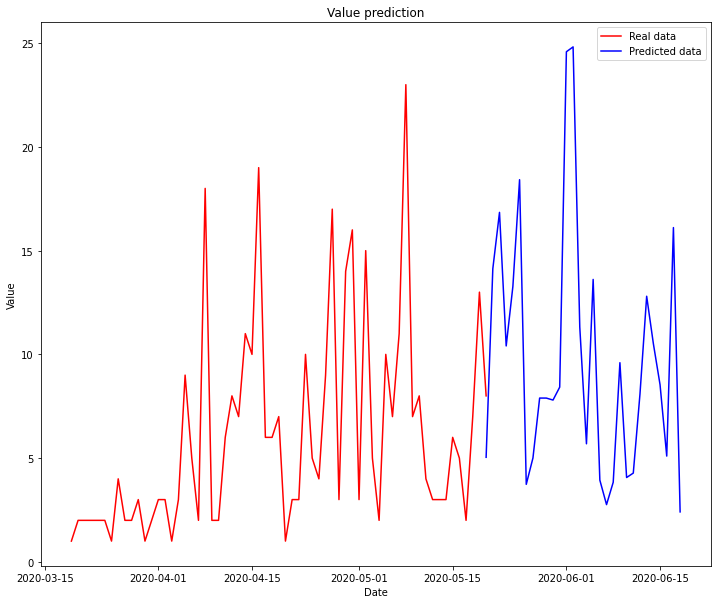

In [2]:
# Part 3 - Predict the data

from datetime import datetime, timedelta
last_date = dataset_train.iloc[-1][0]
last_date = datetime.strptime(last_date, date_format)
days = []
predicted_data = []
i = 0

# the first input should be the last values from the training set
X_last = np.array(training_set[-time_steps:], dtype='float32')

predict_range = 30
for i in range(predict_range):
    # reshape and transform the original values
    inputs = X_last.reshape(-1, 1)
    inputs = sc.transform(inputs) #  apply the same scale applied for the train set
    X_test = [inputs]
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    # predict the next value
    predicted_value = regressor.predict(X_test)
    predicted_value = sc.inverse_transform(predicted_value)  # inverse the scales and return the original scales
    if predicted_value[0][0] < 0:
        predicted_value[0][0] = 0

    # add the predicted value at the end and drop the first one in the X_last list
    X_last = np.concatenate((X_last[1:], predicted_value), axis=0)
    
    # visualising the results
    v = predicted_value[0]
    date = last_date + timedelta(days=i)
    days.append([date.date(), 0])
    predicted_data.append([date.date(), v[0]])
    
training_data = dataset_train.values
training_data = [[datetime.strptime(d[0], date_format), d[1]] for d in training_data]

plt.figure(figsize=(12,10))
plt.plot([p[0] for p in training_data], [p[1] for p in training_data], color='red', label='Real data')
plt.plot([p[0] for p in predicted_data], [p[1] for p in predicted_data], color='blue', label='Predicted data')
plt.title('Value prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()